<h3 style="text-align: center;"><b>«Практическое занятие по доверительным интервалам»</b></h3>

In [1]:
import numpy as np # Numeric Python
import pandas as pd # Panel Data
import math
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import norm

try:
    import plotly.express as px
except ImportError:
    !pip install plotly.express
    import plotly.express as px
    

## Расчет по формуле

<b>Пример.</b> По данным $7$ измерений некоторой величины найдены:
* `средняя` результатов измерений, равная $30$ 
* и `выборочная дисперсия`, равная $36$.  

Найдите `границы`, в которых с `надежностью` $0,95$ заключено истинное значение измеряемой величины. 

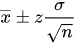

#### Confidence Interval
### $CI = \hat{\mu} \pm t_{{\alpha/2}, df} * \frac{\hat\sigma}{\sqrt{n}} = \hat{\mu} \pm t_{{\alpha/2}, df} * SE$  
* $\hat{\mu}$ - среднее в ГС
* $ t_{{\alpha/2};df}$ — двусторонняя критическая величина t-критерий Стьюдента,  
      $\alpha$ - вероятность совершить ошибку $I$ (отвергнуть нулевую гипотезу, в то время как она верна).  
* $df$ — степень свободы = n — 1, от английского «degrees of freedom»
* $SE$ - stanadard error of the mean

In [2]:
n = 7 # Размер выборки
dof = n - 1 # Число степеней свободы 
mn = 30 # Среднее значение
D = 36
se = np.sqrt(D) # Стандартное отклонение
confidence = 0.95
T = 2.45  # Параметр t распределения. Таблицу значений можно легко найти в поисковике

#### `ppf(q, df, [loc=0], [scale=1])` - percent point function calculates X for a given PDF
`ppf` Percent Point Function calculates the *inverse cumulative distribution function*,  
by definition a result of **x** for a given `q`-value and `df` means P{ T <= x} = q, i.e,  
there is probability q of getting outcomes  
**less than or equal to x** from a T distribution with the given loc and scale.  
The loc (mean) and scale (standard deviation) arguments are optional, and default to 0 and 1, respectively.

In [3]:
round(st.t.ppf( (1+confidence)/2, dof),3) # Percent point function (inverse of cdf)

2.447

In [4]:
# manual
print(f'Confidence Interval (t = 2.45) is: [ {mn - T * se /np.sqrt(n):5.3f}, {mn + T * se /np.sqrt(n):5.3f} ]')

Confidence Interval (t = 2.45) is: [ 24.444, 35.556 ]


In [5]:
ci_low = mn - st.t.ppf( 0.975, dof) * se /np.sqrt(n)
ci_upp = mn + st.t.ppf( 0.975, dof) * se /np.sqrt(n)
print(f'Confidence Interval is: [ {ci_low:5.3f}, {ci_upp:5.3f} ]')

Confidence Interval is: [ 24.451, 35.549 ]


In [6]:
ci_low = mn + st.t.ppf( (1-confidence)/2, dof) * se /np.sqrt(n)
ci_upp = mn + st.t.ppf( (1 + confidence)/2, dof) * se /np.sqrt(n)
print(f'Confidence Interval ppf(conf, dof) is: [ {ci_low:5.3f}, {ci_upp:5.3f} ]')

Confidence Interval ppf(conf, dof) is: [ 24.451, 35.549 ]


## Собственная функция

Вспомогательная функция для подсчета доверительного интервала для маленьких выборок (до 30 элементов, t распределение).

In [7]:
def mean_confidence_interval(data, confidence=0.95): 
    n = len(data)
    m, se = np.mean(data), st.sem(data)  # Standard Error of the Mean
    # looking for X where t = 0.95
    # To get a 95% margin of error, you want 5% of the probability to be in the tails of the distribution. 
    # This is usually done symmetrically so that 2.5% is in each tail, 
    # so you would use q values of 0.025 and 0.975 for the lower and upper cutoff points respectively. 

    # var1
    h = se * st.t.ppf((1 + confidence)/2, n-1)
    return m - h, m, m + h

    # var2
    # t_stat_lower = st.t.ppf((1 - confidence)/2, n-1)  
    # t_stat_upper = st.t.ppf((1 + confidence)/2, n-1) 
    # return m + se * t_stat_lower, m, m + t_stat_upper

     


In [8]:
a =  [5,7,7,9,10,16,7,14,13,15,16,15,
     16,17,18,13,14,15,6,13, 14, 12 ,13 ]

print(mean_confidence_interval(a, 0.60))
print(mean_confidence_interval(a, 0.90))
print(mean_confidence_interval(a, 0.99))

(11.707199792530355, 12.391304347826088, 13.07540890312182)
(11.02260721314349, 12.391304347826088, 13.760001482508686)
(10.1445373309875, 12.391304347826088, 14.638071364664675)


## <b>Пример.</b> Попробуем с помощью доверительного интервала  
## оценить результаты выборов.

<p style="align: center;"><img align=center src="https://www.englisch-hilfen.de/images/usa/states/map.gif"  width=400></p>

In [9]:
US_elect_county = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/2012_US_elect_county.csv'
 
df = pd.read_csv(US_elect_county, sep=',') # Откроем датасет

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4074 entries, 0 to 4073
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   State Postal  4074 non-null   object
 1   County Name   4074 non-null   object
 2   FIPS          4074 non-null   int64 
 3   Obama vote    4074 non-null   object
 4   %             4073 non-null   object
 5   Romney vote   4074 non-null   object
 6   %.1           4073 non-null   object
dtypes: int64(1), object(6)
memory usage: 222.9+ KB


In [11]:
df.isna().sum()

State Postal    0
County Name     0
FIPS            0
Obama vote      0
%               1
Romney vote     0
%.1             1
dtype: int64

In [12]:
df[df['%']=='#DIV/0!']

,State Postal,County Name,FIPS,Obama vote,%,Romney vote,%.1
1429,ME,Hancock Cty Townships,23009,0,#DIV/0!,0,#DIV/0!


In [13]:
df.dropna(how='any',inplace=True)  #Удалим пустые значения
df=df[ df['%'] != '#DIV/0!'][['State Postal','County Name','%']] #Удалим мусор из данных и оставим только нужное
df['%'] = df['%'].astype(float) # Приведем к численному значению результаты голосования
df.head()

,State Postal,County Name,%
0,AK,Alaska,41.6
1,AK,Alaska,41.6
2,AL,Alabama,38.4
3,AL,Autauga,26.6
4,AL,Baldwin,21.6


Среднее по всей выборке: 44.079
                     sd: 15.742


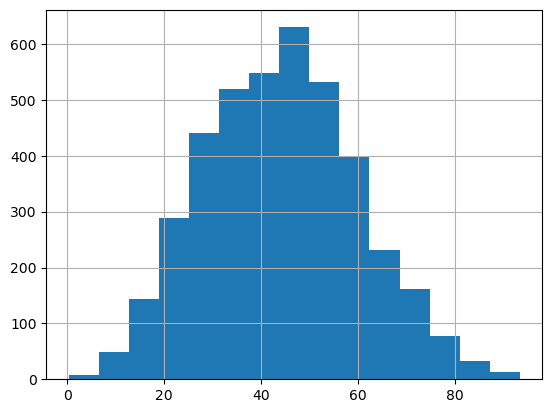

In [14]:
df['%'].hist(bins=15)
print(f"Среднее по всей выборке: {df['%'].mean():.3f}")
print(f"{' '*21}sd: {df['%'].std():.3f}")

In [15]:
mean_confidence_interval(df['%'], 0.99)

(43.443717578289764, 44.07946954813346, 44.715221517977156)

Mean and CI in some states

In [16]:
some_states = ['AK','OH','WV','ME','CA','MD']

sub_df = df.loc[df['State Postal'].isin(some_states)]  # Выборка по нескольким штатам

l, s, r = mean_confidence_interval(sub_df['%'], 0.99)
l, s, r

(47.33158966272541, 48.45610425240053, 49.580618842075644)

We infer that the population mean is out of the CI in some states.  
The cause is the sample is not representative.

## Встроенные функции scipy.stats

### Расчет с использованием нормального распределения

Длина выборки более 30 элементов.

<b>Пример.</b> Используем выборку размером $n=100$ и определим $90\%$ и $99\%$ доверительные интервалы, используя нормальное распределение.

In [17]:
np.random.seed(54)  # Закрепим seed для воспроизводимости результата.

# Генерируем случайное множество с нормальным распределением, где среднее = loc, а стандартное отклонение = scale
sample_size = int(1e4)
dataN = st.norm.rvs(loc=25, scale=5, size= sample_size)  # rvs: Random variates of given size(100) and type(norm).

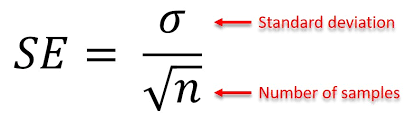

In [18]:
# mean, std, sem  of the real generated sample  
print(f'Sample mean: {np.mean(dataN):>29.3f}')
print(f'Standard Error of the sample Mean: {st.sem(dataN):>10.06f}  (out of 5/sqrt({sample_size}) )')
print(f'Standard deviation sd: {np.std(dataN):>20.04f}  (out of 5)')

Sample mean:                        24.960
Standard Error of the sample Mean:   0.050224  (out of 5/sqrt(10000) )
Standard deviation sd:               5.0221  (out of 5)


### `interval(confidence=0.90, [loc=0, scale=1])`
##### returns lower and upper CI with equal areas around the median.

In [19]:
# interval:  Confidence interval with equal areas around the median.
conf = 0.9
ci_lower, ci_upper = st.norm.interval(confidence = conf, loc=np.mean(dataN), scale=st.sem(dataN))  #
print(f'Мы уверены на {conf * 100:.0f}%, что истинное среднее значение генеральной совокупности находится в диапазоне между {ci_lower:5.3f} и {ci_upper:5.3f}')
norm_90_range = ci_upper - ci_lower
norm_90_range 

Мы уверены на 90%, что истинное среднее значение генеральной совокупности находится в диапазоне между 24.877 и 25.042


0.1652210313568503

In [20]:
conf = 0.99
ci_lower, ci_upper = st.norm.interval(confidence = conf, loc=np.mean(dataN), scale=st.sem(dataN))  #
print(f'Мы уверены на {conf * 100:.0f}%, что истинное среднее значение генеральной совокупности находится в диапазоне между {ci_lower:5.5f} и {ci_upper:5.5f}')
norm_99_range = ci_upper - ci_lower
norm_99_range

Мы уверены на 99%, что истинное среднее значение генеральной совокупности находится в диапазоне между 24.83041 и 25.08914


0.2587349823463043

#### Let's compare the CI using t-curve

In [21]:
conf = 0.99
ci_lower, ci_upper = st.t.interval(confidence = conf, df=len(dataN)-1, loc=np.mean(dataN), scale=st.sem(dataN) ) #
print(f'Мы уверены на {conf * 100:.0f}%, что истинное среднее значение генеральной совокупности находится в диапазоне между {ci_lower:5.5f} и {ci_upper:5.5f}')
norm_99_range = ci_upper - ci_lower
norm_99_range

Мы уверены на 99%, что истинное среднее значение генеральной совокупности находится в диапазоне между 24.83038 и 25.08917


0.25878438153354466

##### The difference is only seen in forth decimal digits. 
So computations are practically identical.

In [22]:
# print(st.norm.__doc__)

### Расчет с использованием t распределения

Длина выборки менее 30 элементов. 

<b>Пример.</b> Используем выборку размером $n=20$ и определим $90\%$ и $99\%$ доверительные интервалы, используя t распределение.

In [23]:
np.random.seed(54)  # Закрепим seed для воспроизводимости результата.

# Генерируем случайное множество с нормальным распределением, где среднее = loc, а стандартное отклонение = scale
dataT = st.norm.rvs(loc=25, scale=5, size=20)
dataT

array([15.73894628, 19.59500504, 25.39281913, 18.22932204, 28.1307423 ,
       28.66693776, 17.64510722, 16.62290224, 27.91513782, 21.61269469,
       28.38777594, 25.92764723, 19.2158274 , 20.90224588, 20.48267271,
       22.35407158, 23.12972966, 23.19403118, 21.09564881, 37.54233791])

In [24]:
ci_lower, ci_upper = st.t.interval(confidence=0.90, df=len(dataT)-1, loc=np.mean(dataT), scale=st.sem(dataT))
print(f'Мы уверены на 90%, что истинное среднее значение генеральной совокупности находится в диапазоне между {ci_lower:4.3f} и {ci_upper:5.3f}')
t_90_range = ci_upper - ci_lower
t_90_range

Мы уверены на 90%, что истинное среднее значение генеральной совокупности находится в диапазоне между 21.057 и 25.121


4.063866205774961

In [25]:
ci_lower, ci_upper = st.t.interval(confidence=0.99, df=len(dataT)-1, loc=np.mean(dataT), scale=st.sem(dataT))
print(f'Мы уверены на 99%, что истинное среднее значение генеральной совокупности находится в диапазоне между {ci_lower:4.3f} и {ci_upper:5.3f}')
t_99_range = ci_upper - ci_lower
t_99_range

Мы уверены на 99%, что истинное среднее значение генеральной совокупности находится в диапазоне между 19.727 и 26.451


6.723864926173263

In [26]:
print(f'With decreasing of the size of the sample the CI increases by (90%): {t_90_range/norm_90_range:4.3f}')
print(f'{" "*61} (99%): {t_99_range/norm_99_range:4.3f}')

With decreasing of the size of the sample the CI increases by (90%): 24.597
                                                              (99%): 25.982


## Определение $N$ размера выборки

`Пример` 
Допустим, Вы журналист и оказались в 2016 году в преддверии выборов президента в США.  
Вы хотите по результатам своих исследований достаточно точно определить, кто победит на этих выборах.  
Сколько вам необходимо опросить людей, чтобы назвать будущего президента с точность в 95%?

Результаты предшествующих исследований свидетельствуют, что стандартное отклонение генеральной совокупности равно 15.7.  

Дано:  
* погрешность измерений $\Delta$: + - 5 %.  
* стандартное отклонение $\sigma$ = 15.7.

  $$ N = (\frac{Z*\sigma}{\Delta})^2$$
- $\Delta$ - допустимая ошибка/погрешность в измерениях ( + / - %), 
- $\sigma$ - стандартное отклонение ГС, 
- Z - квантиль нормального распределения


In [27]:
confidence = 0.95
Z = st.norm.ppf((1 + confidence)/2 )  # Квантиль нормального распределения. Z = 1.959963984540054 (95%)
sigma = 15.7  # Стандартное отклонение ГС
Delta = 5 # Погрешность

In [28]:
N = int(np.ceil(  ((sigma * Z)/ Delta)  **2)  )
N

38

#### Сравним полученные результаты с генеральной совокупностью.

In [29]:
print(f"Стандартное отклонение ГС: {df['%'].std():.3f}")
print(f"Среднее в ГС: {df['%'].mean():.3f}")
# df['%'].hist(bins=30);

Стандартное отклонение ГС: 15.742
Среднее в ГС: 44.079


##### Возьмем выборку из случайных   $n$  значений

In [30]:
# np.random.seed(67)  # Закрепим seed для воспроизводимости результата.

# Возьмем выборку из случайных n значений
sub_df = df['%'].sample(n = N) 
sub_df.shape

(38,)

In [31]:
# calculating statistics 
mn = sub_df.mean()  # sample Mean
sd = df['%'].std()  # population sigma (sd)
# we know population SIGMA (sd) so we use it instead of SEM 
# se = st.sem(sub_df), sd / np.sqrt (N) # SEM  
mn, sd

(43.21578947368422, 15.742396788859033)

In [32]:
# st.norm.ppf( (1+confidence)/2)

In [33]:
# ci_low = mn + st.t.ppf( (1-confidence)/2, N-1) * sd/np.sqrt(n)
# ci_upp = mn + st.t.ppf( (1 + confidence)/2, N-1) * sd/np.sqrt(n)

# we know population SIGMA and N > 30 so we use Normal distribution 
ci_low = mn + st.norm.ppf( (1 - confidence)/2 ) * sd/np.sqrt(N)
ci_upp = mn + st.norm.ppf( (1 + confidence)/2 ) * sd/np.sqrt(N)

print(f'Confidence Interval  is: [ {ci_low:5.3f}, {ci_upp:5.3f} ]')

print(f"Среднее выборки: {mn:.3f}  (+- {st.norm.ppf( (1 + confidence)/2 )* sd/np.sqrt(N):3.3f})")
# print(f"Доверительный интервал: ({mn - Delta:.3f}, {mn + Delta:.3f})")
print(f"Среднее генеральной совокупности: {df['%'].mean():.3f}")

Confidence Interval  is: [ 38.211, 48.221 ]
Среднее выборки: 43.216  (+- 5.005)
Среднее генеральной совокупности: 44.079


#### `Min sample size`

## Определения размера выборки
<b>Пример.</b> Часто возникают ситуации, когда размер выборки может зависеть от оценки размера генеральной совокупности. Например, если мы хотим провести опрос клиентов банка на предмет удобства или качества обслуживания. Неужели размер выборки будет одинаковый если у нас 10 000 клиентов или 1 000 000 клиентов?

В этом случае для определения размера выборки можно использовать оценку размера генеральной совокупности по следующей формуле:

$$ N = \frac {Z^2 * p * (1-p)} {\Delta^2 * (1+\frac{Z^2 * p * (1-p)}{N * \Delta^2})} $$
* $N$ - population size
* $n$ - sample size
* $Z$ - z-score of confidence level
* $p$ - is the fraction of responses that you are interested in
* $\Delta$ - is the M.O.E (margin of error)

In [34]:
confidence = 0.95
Z = st.norm.ppf( (1+confidence)/2)
Delta = 0.05 # measurement error
pop_size = 8e6
p_fraction = 0.5

In [35]:
# minimum sample size
sample_size = round(Z**2*p_fraction*(1-p_fraction)/Delta**2/(1+(Z**2*p_fraction*(1-p_fraction)/(pop_size * Delta**2))),2)
print(f'The minimum sample size is {sample_size:.0f}')

The minimum sample size is 384


#### `Margin of error`
### $ \Delta = Z\sqrt{\frac{p(1-p)(N-n)}{n(N-1)}}$
* $\Delta$ - is the M.O.E (margin of error)
* $p$ - is the fraction of responses that you are interested in
* $N$ - population size
* $n$ - sample size
* $Z$ - z-score of confidence level

In [36]:
# margin of error
sample_size = 663
Delta = Z*np.sqrt(p_fraction*(1-p_fraction)*(pop_size-sample_size)/sample_size/(pop_size - 1))
print(f'The M.O.E. +- {Delta:.2%}')

The M.O.E. +- 3.81%


#### `Some visualization` (Min SS over given population size  $10$ to $10^9$)

In [37]:
pop_range = np.logspace(1,9, base= 10, num= 50)
df_pop= pd.DataFrame(pop_range,  columns=['Pop_size'])

In [38]:
def my_lambda(row):
    return (Z**2*p_fraction*(1-p_fraction)/Delta**2)/(1+(Z**2*p_fraction*(1-p_fraction)/(row * Delta**2)))

In [39]:
p_fraction = 0.5 # распределение голосов
confidence = 0.5
Z = st.norm.ppf( (1+confidence)/2)
df_pop['sample_N_p0.5'] = df_pop.apply(lambda row: my_lambda(row.Pop_size), axis = 1)

confidence = 0.7
Z = st.norm.ppf( (1+confidence)/2)
df_pop['sample_N_p0.7'] =  df_pop.apply(lambda row: my_lambda(row.Pop_size), axis = 1)

confidence = 0.9
Z = st.norm.ppf( (1+confidence)/2)
df_pop['sample_N_p0.9'] =   df_pop.apply(lambda row: my_lambda(row.Pop_size), axis = 1)

confidence = 0.95
Z = st.norm.ppf( (1+confidence)/2)
df_pop['sample_N_p0.95'] =  df_pop.apply(lambda row: my_lambda(row.Pop_size), axis = 1)

confidence = 0.1
Z = st.norm.ppf( (1+confidence)/2)
df_pop['sample_N_p0.1'] =  df_pop.apply(lambda row: my_lambda(row.Pop_size), axis = 1)

df_pop.sample(3)

,Pop_size,sample_N_p0.5,sample_N_p0.7,sample_N_p0.9,sample_N_p0.95,sample_N_p0.1
35,5.179475e+06,78.523095,185.404611,466.948134,662.969997,2.725565
31,1.151395e+06,78.518931,185.381396,466.800907,662.673254,2.725560
37,1.098541e+07,78.523724,185.408119,466.970384,663.014850,2.725565


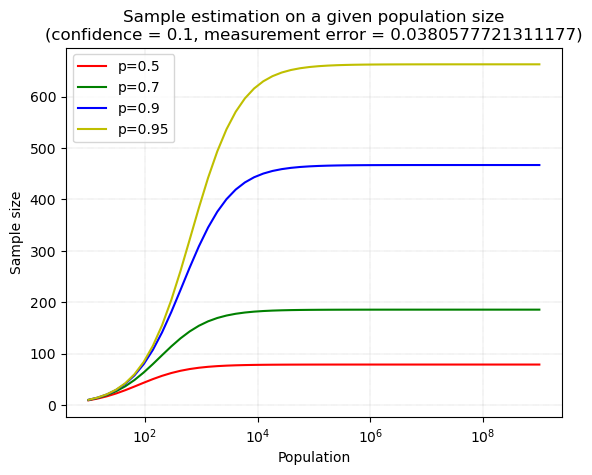

In [40]:
# df_pop.plot(x = 'Pop_size', y= 'sample_N')
fig, ax = plt.subplots()
ax.plot(df_pop['Pop_size'], df_pop['sample_N_p0.5'], c='r',label='p=0.5')
ax.plot(df_pop['Pop_size'], df_pop['sample_N_p0.7'], c='g',label='p=0.7')
ax.plot(df_pop['Pop_size'], df_pop['sample_N_p0.9'], c='b',label='p=0.9')
ax.plot(df_pop['Pop_size'], df_pop['sample_N_p0.95'], c='y',label='p=0.95')
ax.set_xscale('log')
ax.grid(color='gray', axis='both', linestyle=':', linewidth=0.3)
ax.set_xlabel('Population')  # Add an x-label to the axes.
ax.set_ylabel('Sample size')  # Add a y-label to the axes.
ax.set_title(f"Sample estimation on a given population size\n(confidence = {confidence}, measurement error = {Delta})")  # Add a title to the axes.
ax.legend()
plt.show()

In [41]:
fig = px.line(df_pop, x='Pop_size', y = ['sample_N_p0.5','sample_N_p0.7','sample_N_p0.9','sample_N_p0.95'], 
    title = f"Sample estimation on a given population size\n(confidence = {confidence}, measurement error = {Delta})",
    log_x=True, width=1000, height=800)
fig.update_xaxes(rangeslider_visible = True)
fig.show()

In [42]:
t_value = -2
n = 15
df = n - 1

p = 2 * (1 - st.t.cdf(abs(t_value), df))

print(round(p, 3))

0.065
